In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("top5_leagues_player.csv") 
df['height'].fillna(0, inplace=True)         
df['price'].fillna(0, inplace=True) 
df['max_price'].fillna(0,inplace=True)
df['foot'].fillna('unknown', inplace=True)   
df

C:\Users\HC\AppData\Local\Temp\ipykernel_18372\2229934023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height'].fillna(0, inplace=True)
C:\Users\HC\AppData\Local\Temp\ipykernel_18372\2229934023.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.00,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.00,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.00,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.00,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.00,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,2607,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.00,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,2608,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.80,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,2609,Moussa Soumano,NaN,17,0.00,France Mali,NaN,0.90,0.90,Attack - Centre-Forward,34,unknown,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,2610,Romain Hamouma,NaN,36,1.79,France Algeria,Montbéliard,0.60,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other


In [3]:
df.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


In [4]:
df.tail()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
2607,2607,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.0,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,2608,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.8,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,2609,Moussa Soumano,NaN,17,0.00,France Mali,NaN,0.9,0.90,Attack - Centre-Forward,34,unknown,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,2610,Romain Hamouma,NaN,36,1.79,France Algeria,Montbéliard,0.6,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other
2611,2611,Yoann Touzghar,NaN,36,1.80,Tunisia France,Avignon,0.5,1.75,Attack - Centre-Forward,9,right,AC Ajaccio,2024-06-30,2022-08-24,AGJ SP MGMT,NaN,Other


In [5]:
df.drop(columns=["Unnamed: 0","full_name", "joined_club","contract_expires","player_agent", "outfitter", "place_of_birth"], inplace=True)
df.head()

,name,age,height,nationality,price,max_price,position,shirt_nr,foot,club,league
0,Ederson,29,1.88,Brazil Portugal,45.00,70.0,Goalkeeper,31,left,Man City,EPL
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.0,Goalkeeper,18,right,Man City,EPL
2,Scott Carson,37,1.88,England,0.25,6.0,Goalkeeper,33,right,Man City,EPL
3,Rúben Dias,26,1.87,Portugal,75.00,75.0,Defender - Centre-Back,3,right,Man City,EPL
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.0,Defender - Centre-Back,6,left,Man City,EPL


In [6]:
df.isnull().sum()

name           0
age            0
height         0
nationality    0
price          0
max_price      0
position       0
shirt_nr       0
foot           0
club           0
league         0
dtype: int64

In [7]:
df["newname"],uniques=pd.factorize(df["name"])

In [8]:
df

,name,age,height,nationality,price,max_price,position,shirt_nr,foot,club,league,newname
0,Ederson,29,1.88,Brazil Portugal,45.00,70.00,Goalkeeper,31,left,Man City,EPL,0
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,18,right,Man City,EPL,1
2,Scott Carson,37,1.88,England,0.25,6.00,Goalkeeper,33,right,Man City,EPL,2
3,Rúben Dias,26,1.87,Portugal,75.00,75.00,Defender - Centre-Back,3,right,Man City,EPL,3
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,Defender - Centre-Back,6,left,Man City,EPL,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Moussa Djitté,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,Other,2602
2608,Mounaïm El Idrissy,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,Other,2603
2609,Moussa Soumano,17,0.00,France Mali,0.90,0.90,Attack - Centre-Forward,34,unknown,AC Ajaccio,Other,2604
2610,Romain Hamouma,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,Other,2605


In [9]:
df['newnationality'],uniques=pd.factorize(df['nationality'])

In [10]:
df

,name,age,height,nationality,price,max_price,position,shirt_nr,foot,club,league,newname,newnationality
0,Ederson,29,1.88,Brazil Portugal,45.00,70.00,Goalkeeper,31,left,Man City,EPL,0,0
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,18,right,Man City,EPL,1,1
2,Scott Carson,37,1.88,England,0.25,6.00,Goalkeeper,33,right,Man City,EPL,2,2
3,Rúben Dias,26,1.87,Portugal,75.00,75.00,Defender - Centre-Back,3,right,Man City,EPL,3,3
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,Defender - Centre-Back,6,left,Man City,EPL,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Moussa Djitté,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,Other,2602,82
2608,Mounaïm El Idrissy,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,Other,2603,205
2609,Moussa Soumano,17,0.00,France Mali,0.90,0.90,Attack - Centre-Forward,34,unknown,AC Ajaccio,Other,2604,25
2610,Romain Hamouma,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,Other,2605,276


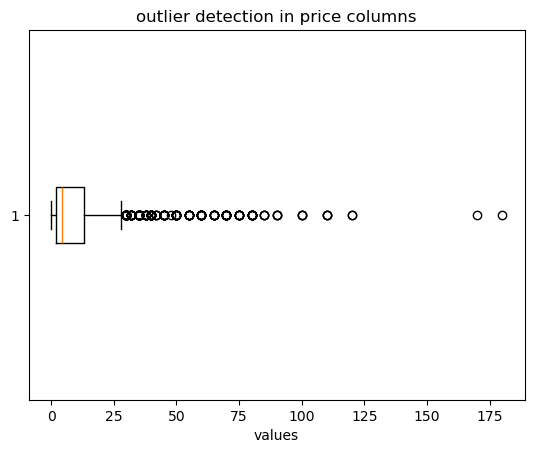

In [11]:
plt.boxplot(df['price'],vert = False)
plt.title('outlier detection in price columns')
plt.xlabel('values')
plt.show()

In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR 
df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
df

,name,age,height,nationality,price,max_price,position,shirt_nr,foot,club,league,newname,newnationality
0,Ederson,29,1.88,Brazil Portugal,45.0,70.0,Goalkeeper,31,left,Man City,EPL,0,0
3,Rúben Dias,26,1.87,Portugal,75.0,75.0,Defender - Centre-Back,3,right,Man City,EPL,3,3
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.0,40.0,Defender - Centre-Back,6,left,Man City,EPL,4,4
5,John Stones,28,1.88,England,30.0,60.0,Defender - Centre-Back,5,right,Man City,EPL,5,2
6,Aymeric Laporte,28,1.89,Spain France,30.0,75.0,Defender - Centre-Back,14,left,Man City,EPL,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,Seko Fofana,28,1.85,Cote d'Ivoire France,30.0,30.0,midfield - Central Midfield,8,right,Lens,Ligue1,2277,101
2288,Loïs Openda,23,1.77,Belgium Morocco,20.0,20.0,Attack - Centre-Forward,11,right,Lens,Ligue1,2284,398
2293,Alban Lafont,24,1.96,France Burkina Faso,20.0,20.0,Goalkeeper,1,right,FC Nantes,Ligue1,2289,399
2344,Elye Wahi,20,1.84,France Cote d'Ivoire,25.0,25.0,Attack - Centre-Forward,21,right,Montpellier,Ligue1,2340,20


C:\Users\HC\AppData\Local\Temp\ipykernel_18372\3742963719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='max_price', data=df, palette=colors)
C:\Users\HC\AppData\Local\Temp\ipykernel_18372\3742963719.py:3: UserWarning: 
The palette list has fewer values (10) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='age', y='max_price', data=df, palette=colors)


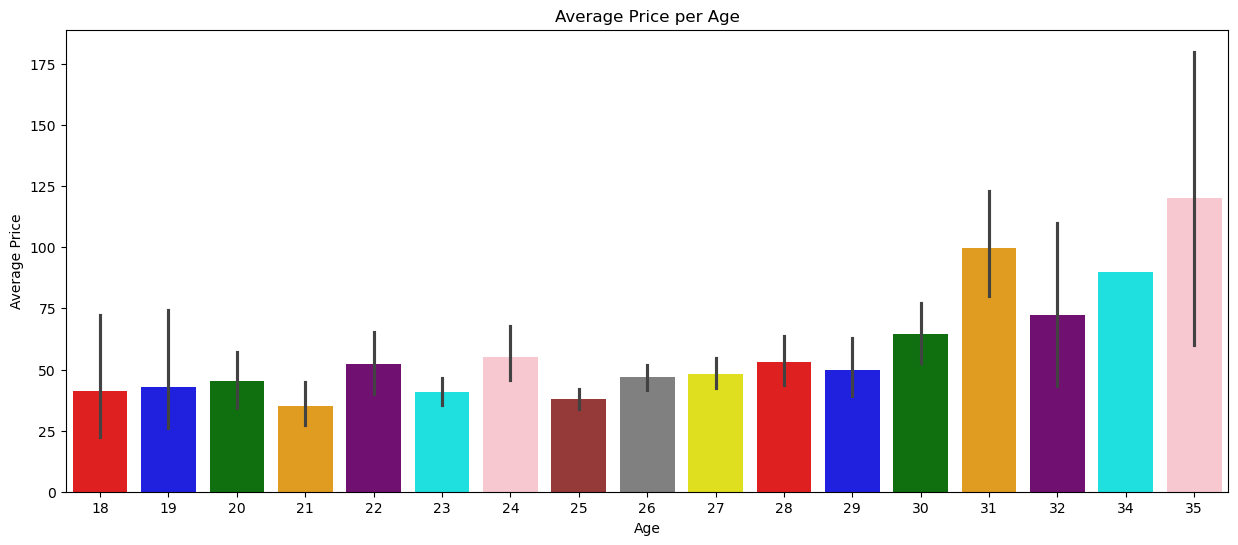

In [13]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'aqua', 'pink', 'brown', 'gray', 'yellow']
plt.figure(figsize=(15, 6))
sns.barplot(x='age', y='max_price', data=df, palette=colors)
plt.title('Average Price per Age')
plt.xlabel('Age')
plt.ylabel('Average Price')
plt.show()

In [14]:
# df['price'] = [max(min(x,lower_bound),upper_bound)for x in df['price']]
# df

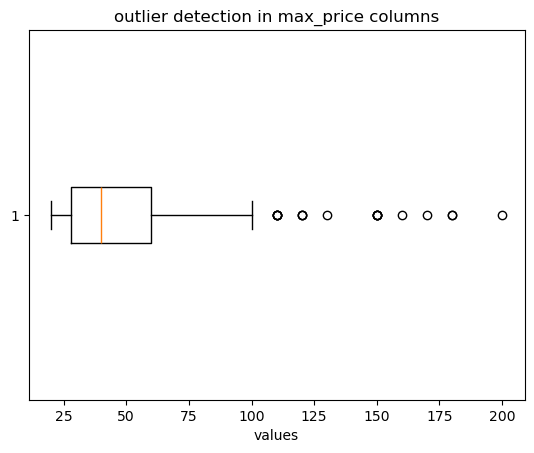

In [16]:
plt.boxplot(df['max_price'],vert = False)
plt.title('outlier detection in max_price columns')
plt.xlabel('values')
plt.show()

In [17]:
Q1 = df['max_price'].quantile(0.25)
Q3 = df['max_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR 
df = df[(df['max_price'] < lower_bound) | (df['max_price'] >= upper_bound)]
df

,name,age,height,nationality,price,max_price,position,shirt_nr,foot,club,league,newname,newnationality
12,Rodri,26,1.91,Spain,80.0,80.0,midfield - Defensive Midfield,16,right,Man City,EPL,12,7
16,Kevin De Bruyne,31,1.81,Belgium,80.0,150.0,midfield - Attacking Midfield,17,right,Man City,EPL,16,12
17,Bernardo Silva,28,1.73,Portugal,80.0,100.0,midfield - Attacking Midfield,20,left,Man City,EPL,17,3
19,Phil Foden,22,1.71,England,110.0,110.0,Attack - Left Winger,47,left,Man City,EPL,19,2
20,Jack Grealish,27,1.80,England Ireland,70.0,100.0,Attack - Left Winger,10,right,Man City,EPL,20,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Marcos Llorente,28,1.84,Spain,35.0,80.0,midfield - Central Midfield,14,right,Atlético Madrid,LaLiga,1660,7
1669,Antoine Griezmann,32,1.76,France,25.0,150.0,Attack - Second Striker,8,left,Atlético Madrid,LaLiga,1667,76
2114,Neymar,31,1.75,Brazil,70.0,180.0,Attack - Left Winger,10,right,Paris SG,Ligue1,2111,38
2115,Lionel Messi,35,1.70,Argentina Spain,45.0,180.0,Attack - Right Winger,30,left,Paris SG,Ligue1,2112,10


In [18]:
df['max_price'] = [max(min(x,lower_bound),upper_bound)for x in df['max_price']]
df

C:\Users\HC\AppData\Local\Temp\ipykernel_18372\3722895314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_price'] = [max(min(x,lower_bound),upper_bound)for x in df['max_price']]


,name,age,height,nationality,price,max_price,position,shirt_nr,foot,club,league,newname,newnationality
12,Rodri,26,1.91,Spain,80.0,76.0,midfield - Defensive Midfield,16,right,Man City,EPL,12,7
16,Kevin De Bruyne,31,1.81,Belgium,80.0,76.0,midfield - Attacking Midfield,17,right,Man City,EPL,16,12
17,Bernardo Silva,28,1.73,Portugal,80.0,76.0,midfield - Attacking Midfield,20,left,Man City,EPL,17,3
19,Phil Foden,22,1.71,England,110.0,76.0,Attack - Left Winger,47,left,Man City,EPL,19,2
20,Jack Grealish,27,1.80,England Ireland,70.0,76.0,Attack - Left Winger,10,right,Man City,EPL,20,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Marcos Llorente,28,1.84,Spain,35.0,76.0,midfield - Central Midfield,14,right,Atlético Madrid,LaLiga,1660,7
1669,Antoine Griezmann,32,1.76,France,25.0,76.0,Attack - Second Striker,8,left,Atlético Madrid,LaLiga,1667,76
2114,Neymar,31,1.75,Brazil,70.0,76.0,Attack - Left Winger,10,right,Paris SG,Ligue1,2111,38
2115,Lionel Messi,35,1.70,Argentina Spain,45.0,76.0,Attack - Right Winger,30,left,Paris SG,Ligue1,2112,10


In [19]:
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['price_binned'] = kbd.fit_transform(df[['price']])
df

C:\Users\HC\AppData\Local\Temp\ipykernel_18372\4154579736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_binned'] = kbd.fit_transform(df[['price']])


,name,age,height,nationality,price,max_price,position,shirt_nr,foot,club,league,newname,newnationality,price_binned
12,Rodri,26,1.91,Spain,80.0,76.0,midfield - Defensive Midfield,16,right,Man City,EPL,12,7,1.0
16,Kevin De Bruyne,31,1.81,Belgium,80.0,76.0,midfield - Attacking Midfield,17,right,Man City,EPL,16,12,1.0
17,Bernardo Silva,28,1.73,Portugal,80.0,76.0,midfield - Attacking Midfield,20,left,Man City,EPL,17,3,1.0
19,Phil Foden,22,1.71,England,110.0,76.0,Attack - Left Winger,47,left,Man City,EPL,19,2,2.0
20,Jack Grealish,27,1.80,England Ireland,70.0,76.0,Attack - Left Winger,10,right,Man City,EPL,20,13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Marcos Llorente,28,1.84,Spain,35.0,76.0,midfield - Central Midfield,14,right,Atlético Madrid,LaLiga,1660,7,0.0
1669,Antoine Griezmann,32,1.76,France,25.0,76.0,Attack - Second Striker,8,left,Atlético Madrid,LaLiga,1667,76,0.0
2114,Neymar,31,1.75,Brazil,70.0,76.0,Attack - Left Winger,10,right,Paris SG,Ligue1,2111,38,1.0
2115,Lionel Messi,35,1.70,Argentina Spain,45.0,76.0,Attack - Right Winger,30,left,Paris SG,Ligue1,2112,10,0.0


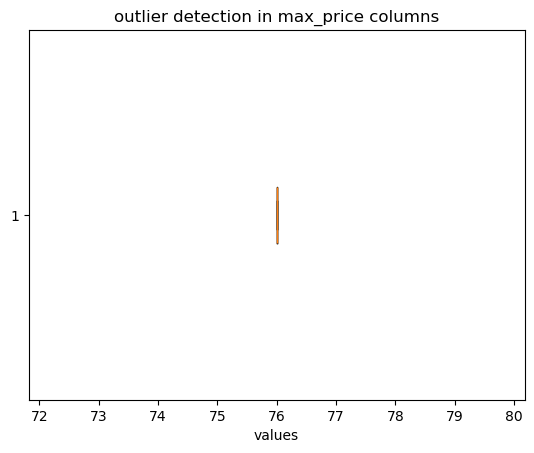

In [20]:
plt.boxplot(df['max_price'],vert = False)
plt.title('outlier detection in max_price columns')
plt.xlabel('values')
plt.show()

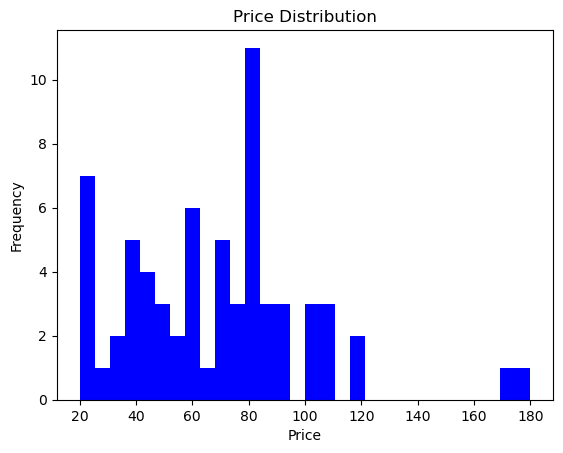

In [21]:
plt.hist(df['price'], bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

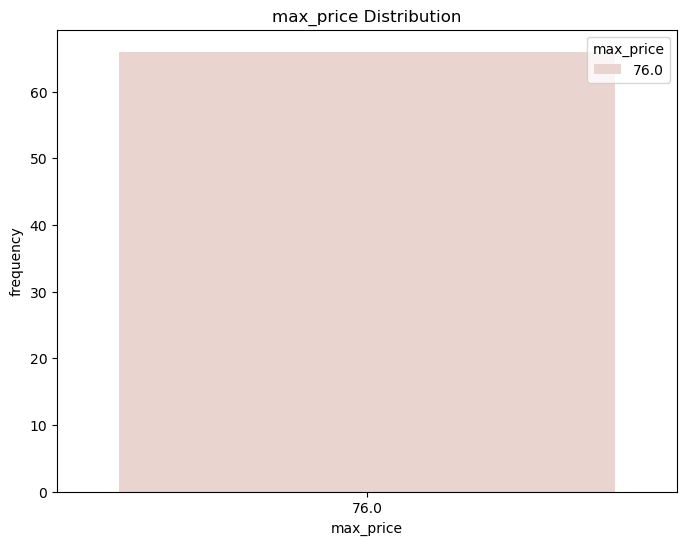

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(x= 'max_price',hue='max_price',data=df)
plt.xlabel('max_price')
plt.ylabel('frequency')
plt.title('max_price Distribution')
plt.show()

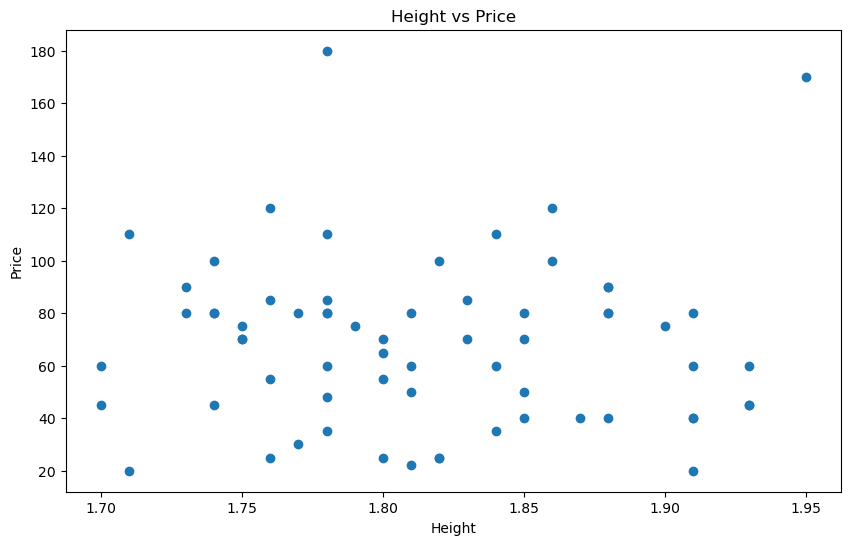

In [23]:
plt.figure(figsize = (10,6))
plt.scatter(df['height'], df['price'])
plt.xlabel('Height')
plt.ylabel('Price')
plt.title('Height vs Price')
plt.show()

In [24]:
# x = df[['height','age','max_price','shirt_nr','newname','newnationality']]
# y = df[['price']]
# X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state= 35, test_size = 0.1)
# model = LogisticRegression(max_iter = 1000)
# model.fit(X_train,Y_train)

C:\Users\HC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [25]:
# y_pred = model.predict(X_test)

In [54]:
bins = [0, 100, 500, float('inf')]
labels = [0, 1, 2] 
df['price_cat'] = pd.cut(df['price'], bins=bins, labels=labels)
y = df[['price_cat']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=35)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.71%


C:\Users\HC\AppData\Local\Temp\ipykernel_18372\3837262213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_cat'] = pd.cut(df['price'], bins=bins, labels=labels)
C:\Users\HC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
